<a href="https://colab.research.google.com/github/natrask/ENM1050/blob/main/Code%20examples/Lecture03_datafromgoogleform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import packages for connecting to Spreadsheets
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

# Authorize Colab to access Spreadsheets
gc = gspread.authorize(creds)

In [2]:
surveyData = gc.open_by_url('https://docs.google.com/spreadsheets/d/1nsWF4ZapF2enpP6-COU4BpYwGMEwly_20mGdCdXKL6o/edit?resourcekey=&gid=726529752#gid=726529752').sheet1
data = surveyData.get_all_values()
print(data)

[['Timestamp', 'How would you rate your programming background coming into this course?', 'Where are you in your studies?', 'Are you in an engineering major?', "Do you have any feedback you'd like to see incorporated in this class? It's a big class, but we do our best to track the trends of what the students are looking for."], ['9/9/2024 9:36:58', '5', 'Other', 'Yes', 'This is nat, hi!'], ['9/9/2024 10:22:30', '5', 'Other', 'Yes', ''], ['9/9/2024 10:54:42', '4', 'Junior', 'Yes', ''], ['9/9/2024 13:49:02', '4', 'Sophmore', 'Yes', ''], ['9/9/2024 13:49:06', '2', 'Freshman', 'Yes', ''], ['9/9/2024 13:49:07', '3', 'Freshman', 'Yes', ''], ['9/9/2024 13:49:12', '4', 'Sophmore', 'Yes', ''], ['9/9/2024 13:49:14', '1', 'Sophmore', 'Undecided', ''], ['9/9/2024 13:49:18', '2', 'Sophmore', 'Undecided', ''], ['9/9/2024 13:49:24', '3', 'Junior', 'No', ''], ['9/9/2024 13:49:26', '4', 'Freshman', 'Yes', ''], ['9/9/2024 13:49:30', '3', 'Freshman', 'Yes', ''], ['9/9/2024 13:49:32', '3', 'Sophmore', 'Ye

In [3]:
# This dumps out the list of questions in the survey
data[0]

['Timestamp',
 'How would you rate your programming background coming into this course?',
 'Where are you in your studies?',
 'Are you in an engineering major?',
 "Do you have any feedback you'd like to see incorporated in this class? It's a big class, but we do our best to track the trends of what the students are looking for."]

In [4]:
# This shows the list of responses
data[1:]

[['9/9/2024 9:36:58', '5', 'Other', 'Yes', 'This is nat, hi!'],
 ['9/9/2024 10:22:30', '5', 'Other', 'Yes', ''],
 ['9/9/2024 10:54:42', '4', 'Junior', 'Yes', ''],
 ['9/9/2024 13:49:02', '4', 'Sophmore', 'Yes', ''],
 ['9/9/2024 13:49:06', '2', 'Freshman', 'Yes', ''],
 ['9/9/2024 13:49:07', '3', 'Freshman', 'Yes', ''],
 ['9/9/2024 13:49:12', '4', 'Sophmore', 'Yes', ''],
 ['9/9/2024 13:49:14', '1', 'Sophmore', 'Undecided', ''],
 ['9/9/2024 13:49:18', '2', 'Sophmore', 'Undecided', ''],
 ['9/9/2024 13:49:24', '3', 'Junior', 'No', ''],
 ['9/9/2024 13:49:26', '4', 'Freshman', 'Yes', ''],
 ['9/9/2024 13:49:30', '3', 'Freshman', 'Yes', ''],
 ['9/9/2024 13:49:32', '3', 'Sophmore', 'Yes', ''],
 ['9/9/2024 13:49:37', '3', 'Freshman', 'Yes', ''],
 ['9/9/2024 13:49:40', '1', 'Sophmore', 'Yes', ''],
 ['9/9/2024 13:49:44', '3', 'Freshman', 'Yes', ''],
 ['9/9/2024 13:49:45', '1', 'Sophmore', 'Yes', ''],
 ['9/9/2024 13:49:57', '2', 'Freshman', 'Yes', ''],
 ['9/9/2024 13:50:03', '2', 'Sophmore', 'Yes', '

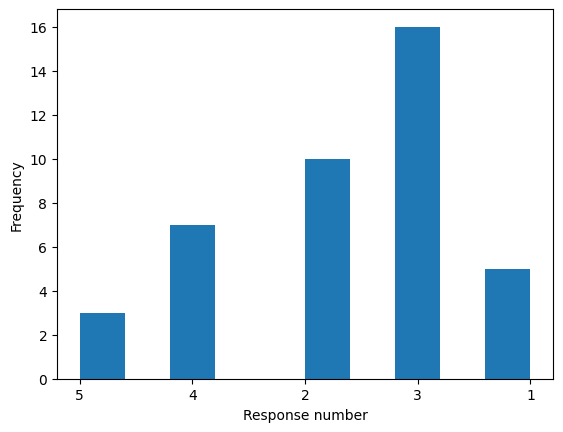

In [15]:
# Extract the column you want (e.g., the first column)
column_tograb = 1
column_data = [row[column_tograb] for row in data[1:]]  # This is something called "list comprehension that we'll cover in a few weeks

import matplotlib.pyplot as plt
plt.hist(column_data)
plt.xlabel('Response number')
plt.ylabel('Frequency')
plt.show()